# <font color = 'blue'> Estudo previsão de falhas (Corrente) - Usando dados ficticios</font>
### <font color = 'gray'> Analista de dados - Alexsander Maia Simas</font>

Estudo focado na previsão de "melhor" e "pior" entrada a nível inicial de inversor, entendimento do comportamento, quais metodos podemos aplicar e classificação das entradas utilizando a corrente do inversor.

- **Detalhamentos:**
     - **Dados coletados porém não posso divulgar por questões de ética**
     - **O dataset contém dados da potência dos inversores do dia 01/11 até 27/11**
- Faremos engenharia de atributos
- Análise estatistica - **Foco nos resultados estatisticos**
- Análise gráfica

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da linguagem python usada neste Jupyter Notebook:', python_version())

Versão da linguagem python usada neste Jupyter Notebook: 3.10.12


In [ ]:
# Carregando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Instalando o pacote watermark
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00


In [ ]:
# autor do jupyter notebook
%reload_ext watermark
%watermark -a "Analista de dados - Alexsander Maia Simas" --iversions

Author: Analista de dados - Alexsander Maia Simas

pandas    : 2.2.2
plotly    : 5.24.1
matplotlib: 3.8.0
platform  : 1.0.8
numpy     : 1.26.4
seaborn   : 0.13.2



## Carregando os dados

In [ ]:
dados_mb1_corrente = pd.read_csv('/content/dados_mb1_corrente_inv_b1.csv', sep=';')
dados_mb1_corrente.head()

,Date (-03:00),Ent01 Corrente Cc (A),Ent02 Corrente Cc (A),Ent03 Corrente Cc (A),Ent04 Corrente Cc (A),Ent05 Corrente Cc (A),Ent06 Corrente Cc (A),Ent07 Corrente Cc (A),Ent08 Corrente Cc (A),Ent09 Corrente Cc (A),Ent10 Corrente Cc (A),Ent11 Corrente Cc (A),Ent12 Corrente Cc (A)
0,01/11/2024 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/11/2024 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/11/2024 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01/11/2024 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01/11/2024 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Verificando se existe valores nulos
dados_mb1_corrente.isnull().sum()

,0
Date (-03:00),0
Ent01 Corrente Cc (A),0
Ent02 Corrente Cc (A),0
Ent03 Corrente Cc (A),0
Ent04 Corrente Cc (A),0
Ent05 Corrente Cc (A),0
Ent06 Corrente Cc (A),0
Ent07 Corrente Cc (A),0
Ent08 Corrente Cc (A),0
Ent09 Corrente Cc (A),0


In [ ]:
dados_mb1_corrente.isna().sum()

,0
Date (-03:00),0
Ent01 Corrente Cc (A),0
Ent02 Corrente Cc (A),0
Ent03 Corrente Cc (A),0
Ent04 Corrente Cc (A),0
Ent05 Corrente Cc (A),0
Ent06 Corrente Cc (A),0
Ent07 Corrente Cc (A),0
Ent08 Corrente Cc (A),0
Ent09 Corrente Cc (A),0


In [ ]:
# Função para limpar dados "noturnos"
def dividir_texto(texto):
  dia = texto[:10]
  hora = texto[11:19]
  return dia, hora

In [ ]:
dados_mb1_corrente[['dia', 'hora']] = dados_mb1_corrente['Date (-03:00)'].apply(dividir_texto).apply(pd.Series)
dados_mb1_corrente.head()

,Date (-03:00),Ent01 Corrente Cc (A),Ent02 Corrente Cc (A),Ent03 Corrente Cc (A),Ent04 Corrente Cc (A),Ent05 Corrente Cc (A),Ent06 Corrente Cc (A),Ent07 Corrente Cc (A),Ent08 Corrente Cc (A),Ent09 Corrente Cc (A),Ent10 Corrente Cc (A),Ent11 Corrente Cc (A),Ent12 Corrente Cc (A),dia,hora
0,01/11/2024 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01/11/2024,01:00:00
1,01/11/2024 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01/11/2024,02:00:00
2,01/11/2024 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01/11/2024,03:00:00
3,01/11/2024 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01/11/2024,04:00:00
4,01/11/2024 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01/11/2024,05:00:00


In [ ]:
filtro_hora = (dados_mb1_corrente['hora'] >= ('00:00:00')) & (dados_mb1_corrente['hora'] <= ('05:55:00'))
filtro_hora_noturna = (dados_mb1_corrente['hora'] >= ('18:05:00')) & (dados_mb1_corrente['hora'] <= ('23:55:00'))
dados_mb1_corrente = dados_mb1_corrente.drop(dados_mb1_corrente[filtro_hora].index)
dados_mb1_corrente = dados_mb1_corrente.drop(dados_mb1_corrente[filtro_hora_noturna].index)

<ipython-input-10-c879c8542776>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados_mb1_corrente = dados_mb1_corrente.drop(dados_mb1_corrente[filtro_hora_noturna].index)


In [ ]:
dados_mb1_corrente = dados_mb1_corrente.reset_index(drop=True)
dados_mb1_corrente.head()

,Date (-03:00),Ent01 Corrente Cc (A),Ent02 Corrente Cc (A),Ent03 Corrente Cc (A),Ent04 Corrente Cc (A),Ent05 Corrente Cc (A),Ent06 Corrente Cc (A),Ent07 Corrente Cc (A),Ent08 Corrente Cc (A),Ent09 Corrente Cc (A),Ent10 Corrente Cc (A),Ent11 Corrente Cc (A),Ent12 Corrente Cc (A),dia,hora
0,01/11/2024 06:00:00,0.1633,0.1725,0.1742,0.1483,0.0675,0.1158,0.2175,0.1158,0.1575,0.1650,0.1558,0.1450,01/11/2024,06:00:00
1,01/11/2024 07:00:00,0.9067,0.9133,0.9283,0.9042,0.0900,0.8600,0.9933,0.8267,0.9100,0.8867,0.8717,0.8742,01/11/2024,07:00:00
2,01/11/2024 08:00:00,5.2200,5.4333,5.2742,5.0250,0.0150,4.9692,5.0133,4.8800,4.9817,4.9025,4.9758,0.0167,01/11/2024,08:00:00
3,01/11/2024 09:00:00,5.9425,6.2075,6.2142,5.8250,0.0000,6.0742,6.0417,5.7683,5.8883,5.9967,5.9492,0.0000,01/11/2024,09:00:00
4,01/11/2024 10:00:00,6.9275,7.1550,7.0850,6.9283,0.0000,7.0000,7.0525,6.8825,7.0175,6.9867,6.9175,0.0000,01/11/2024,10:00:00


In [ ]:
dados_mb1_corrente = dados_mb1_corrente.drop(['Date (-03:00)', 'dia', 'hora'], axis=1)
dados_mb1_corrente.head()

,Ent01 Corrente Cc (A),Ent02 Corrente Cc (A),Ent03 Corrente Cc (A),Ent04 Corrente Cc (A),Ent05 Corrente Cc (A),Ent06 Corrente Cc (A),Ent07 Corrente Cc (A),Ent08 Corrente Cc (A),Ent09 Corrente Cc (A),Ent10 Corrente Cc (A),Ent11 Corrente Cc (A),Ent12 Corrente Cc (A)
0,0.1633,0.1725,0.1742,0.1483,0.0675,0.1158,0.2175,0.1158,0.1575,0.1650,0.1558,0.1450
1,0.9067,0.9133,0.9283,0.9042,0.0900,0.8600,0.9933,0.8267,0.9100,0.8867,0.8717,0.8742
2,5.2200,5.4333,5.2742,5.0250,0.0150,4.9692,5.0133,4.8800,4.9817,4.9025,4.9758,0.0167
3,5.9425,6.2075,6.2142,5.8250,0.0000,6.0742,6.0417,5.7683,5.8883,5.9967,5.9492,0.0000
4,6.9275,7.1550,7.0850,6.9283,0.0000,7.0000,7.0525,6.8825,7.0175,6.9867,6.9175,0.0000


In [ ]:
dados_mb1_corrente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ent01 Corrente Cc (A)  351 non-null    float64
 1   Ent02 Corrente Cc (A)  351 non-null    float64
 2   Ent03 Corrente Cc (A)  351 non-null    float64
 3   Ent04 Corrente Cc (A)  351 non-null    float64
 4   Ent05 Corrente Cc (A)  351 non-null    float64
 5   Ent06 Corrente Cc (A)  351 non-null    float64
 6   Ent07 Corrente Cc (A)  351 non-null    float64
 7   Ent08 Corrente Cc (A)  351 non-null    float64
 8   Ent09 Corrente Cc (A)  351 non-null    float64
 9   Ent10 Corrente Cc (A)  351 non-null    float64
 10  Ent11 Corrente Cc (A)  351 non-null    float64
 11  Ent12 Corrente Cc (A)  351 non-null    float64
dtypes: float64(12)
memory usage: 33.0 KB


In [ ]:
# Renomeando as colunas para ficar mais fácil o entendimento do dataset
dados_mb1_corrente.columns = ['Ent01_corrente', 'Ent02_corrente', 'Ent03_corrente', 'Ent04_corrente', 'Ent05_corrente',
                             'Ent06_corrente', 'Ent07_corrente', 'Ent08_corrente', 'Ent09_corrente','Ent10_corrente', 'Ent11_corrente', 'Ent12_corrente']
dados_mb1_corrente.head()

,Ent01_corrente,Ent02_corrente,Ent03_corrente,Ent04_corrente,Ent05_corrente,Ent06_corrente,Ent07_corrente,Ent08_corrente,Ent09_corrente,Ent10_corrente,Ent11_corrente,Ent12_corrente
0,0.1633,0.1725,0.1742,0.1483,0.0675,0.1158,0.2175,0.1158,0.1575,0.1650,0.1558,0.1450
1,0.9067,0.9133,0.9283,0.9042,0.0900,0.8600,0.9933,0.8267,0.9100,0.8867,0.8717,0.8742
2,5.2200,5.4333,5.2742,5.0250,0.0150,4.9692,5.0133,4.8800,4.9817,4.9025,4.9758,0.0167
3,5.9425,6.2075,6.2142,5.8250,0.0000,6.0742,6.0417,5.7683,5.8883,5.9967,5.9492,0.0000
4,6.9275,7.1550,7.0850,6.9283,0.0000,7.0000,7.0525,6.8825,7.0175,6.9867,6.9175,0.0000


<ipython-input-15-60e524a08533>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


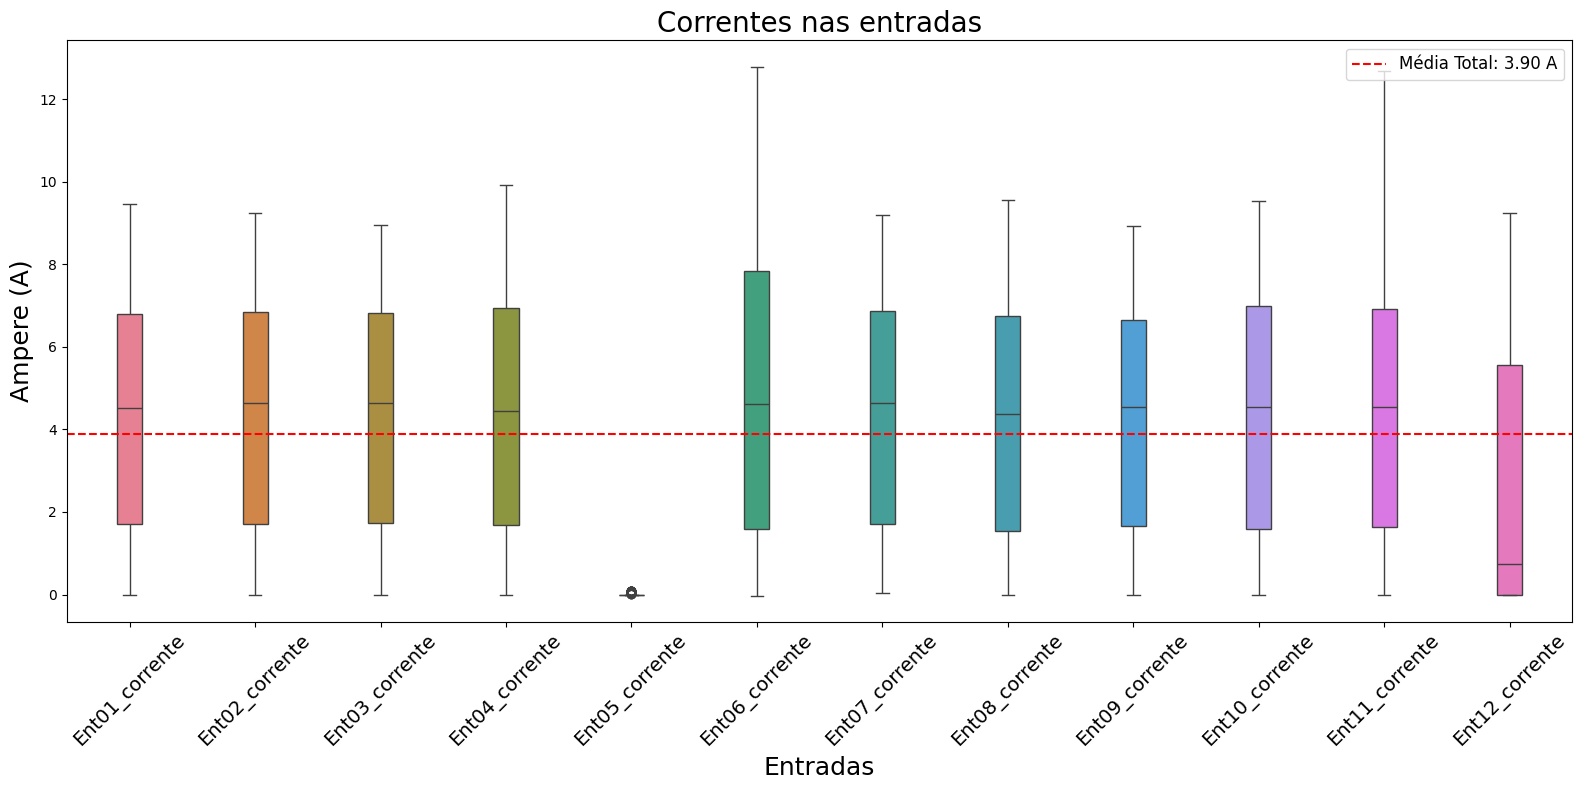

In [ ]:
# Exemplo do seu código com ajustes para aumentar o tamanho do gráfico
ax = sns.boxplot(data=dados_mb1_corrente, orient='v', width=0.2)
ax.figure.set_size_inches(16, 8)  # Aumente o tamanho para 16 x 8 polegadas
ax.set_title('Correntes nas entradas', fontsize=20)  # Título maior
ax.set_ylabel('Ampere (A)', fontsize=18)  # Rótulo Y maior
ax.set_xlabel('Entradas', fontsize=18)  # Rótulo X maior

# Ajuste os rótulos do eixo X
ax.set_xticklabels(
    ['Ent01_corrente', 'Ent02_corrente', 'Ent03_corrente', 'Ent04_corrente', 'Ent05_corrente',
     'Ent06_corrente', 'Ent07_corrente', 'Ent08_corrente', 'Ent09_corrente', 'Ent10_corrente',
     'Ent11_corrente', 'Ent12_corrente'],
    fontsize=14, rotation=45  # Aumente o tamanho e rotacione os rótulos
)
# Calculando a média total de todas as colunas e adicionando uma linha horizontal
media_total = dados_mb1_corrente.iloc[1:].mean().mean()
ax.axhline(media_total, color='red', linestyle='--', label=f'Média Total: {media_total:.2f} A')

# Adicionando a legenda para a linha da média
ax.legend(loc='upper right', fontsize=12)
# Mostre o gráfico
plt.tight_layout()  # Garante que tudo fique bem distribuído no gráfico
plt.show()

In [ ]:
# Calculando as estatísticas de cada inversor
estatistica_inv_b1 = pd.DataFrame({
    'media':dados_mb1_corrente.mean(),
    'mediana':dados_mb1_corrente.median(),
    'desvio_padrao':dados_mb1_corrente.std(),
})
estatistica_inv_b1.sort_values(by=['media', 'mediana'], ascending=False)

,media,mediana,desvio_padrao
Ent06_corrente,4.862054,4.6275,3.584493
Ent11_corrente,4.452878,4.5417,3.120735
Ent10_corrente,4.404144,4.5542,2.961600
Ent02_corrente,4.385044,4.6392,2.886750
Ent07_corrente,4.381823,4.6492,2.830814
Ent04_corrente,4.371956,4.4442,2.923165
Ent03_corrente,4.316920,4.6458,2.789593
Ent01_corrente,4.312467,4.5108,2.828419
Ent08_corrente,4.263085,4.3867,2.898347
Ent09_corrente,4.220581,4.5333,2.740301


In [ ]:
# Calculando a média dos 3 melhores inversores
melhores_entradas_inv_b1 = estatistica_inv_b1['media'].nlargest(3)
melhores_entradas_inv_b1

,media
Ent06_corrente,4.862054
Ent11_corrente,4.452878
Ent10_corrente,4.404144


In [ ]:
media_melhores_3 = melhores_entradas_inv_b1.mean()
media_melhores_3

4.573025261158595

In [ ]:
# Função para calcular a diferença percentual (agora retorna valor numérico)
def calcular_diferenca_percentual(melhores_entradas_inv_b1, media_melhores_3):
    diferenca_percentual = ((media_melhores_3 - melhores_entradas_inv_b1) / media_melhores_3) * 100
    return diferenca_percentual  # Retorna o valor numérico

# Função para calcular a diferença percentual e emitir alertas
def emitir_alerta(melhores_entradas_inv_b1, media_melhores_3):
    diferenca_percentual = calcular_diferenca_percentual(melhores_entradas_inv_b1, media_melhores_3)

    # Gerar alertas com base na diferença percentual
    if diferenca_percentual > 5:
        return 'Alerta crítico, diferença maior que 5%'
    elif 3 <= diferenca_percentual <= 4.99:
        return 'Cuidado desempenho instável'
    else:
        return 'Desempenho estável'

# Aplicar a função para calcular a diferença percentual e adicionar a coluna 'diff_percentual'
estatistica_inv_b1['diff_percentual'] = estatistica_inv_b1['media'].apply(calcular_diferenca_percentual, media_melhores_3=media_melhores_3)

# Aplicar a função para gerar alertas e adicionar a coluna 'alerta'
estatistica_inv_b1['alerta'] = estatistica_inv_b1['media'].apply(emitir_alerta, media_melhores_3=media_melhores_3)

# Se desejar exibir a coluna de diferença percentual com o símbolo de '%' formatado
estatistica_inv_b1['diff_percentual_percentem'] = estatistica_inv_b1['diff_percentual'].apply(lambda x: f"{x:.2f}%")

# Exibir as entradas com alertas
estatistica_inv_b1.sort_values(by=['media', 'mediana'], ascending=False)

,media,mediana,desvio_padrao,diff_percentual,alerta,diff_percentual_percentem
Ent06_corrente,4.862054,4.6275,3.584493,-6.320293,Desempenho estável,-6.32%
Ent11_corrente,4.452878,4.5417,3.120735,2.627309,Desempenho estável,2.63%
Ent10_corrente,4.404144,4.5542,2.961600,3.692984,Cuidado desempenho instável,3.69%
Ent02_corrente,4.385044,4.6392,2.886750,4.110651,Cuidado desempenho instável,4.11%
Ent07_corrente,4.381823,4.6492,2.830814,4.181100,Cuidado desempenho instável,4.18%
Ent04_corrente,4.371956,4.4442,2.923165,4.396858,Cuidado desempenho instável,4.40%
Ent03_corrente,4.316920,4.6458,2.789593,5.600348,"Alerta crítico, diferença maior que 5%",5.60%
Ent01_corrente,4.312467,4.5108,2.828419,5.697717,"Alerta crítico, diferença maior que 5%",5.70%
Ent08_corrente,4.263085,4.3867,2.898347,6.777578,"Alerta crítico, diferença maior que 5%",6.78%
Ent09_corrente,4.220581,4.5333,2.740301,7.707022,"Alerta crítico, diferença maior que 5%",7.71%
